In [4]:
import json
import os
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [5]:
wts_train_labels_path = "/Users/minhnam/Desktop/playground/AICityChallenge2024_Track2/speed_prediction/datasets/avg_img/WTS/train/labels.json"
wts_val_labels_path = "/Users/minhnam/Desktop/playground/AICityChallenge2024_Track2/speed_prediction/datasets/avg_img/WTS/val/labels.json"

wts_train_labels = json.load(open(wts_train_labels_path))
wts_val_labels = json.load(open(wts_val_labels_path))

In [6]:
count_train_labels = Counter([label['speed'] for label in wts_train_labels])
count_val_labels = Counter([label['speed'] for label in wts_val_labels])

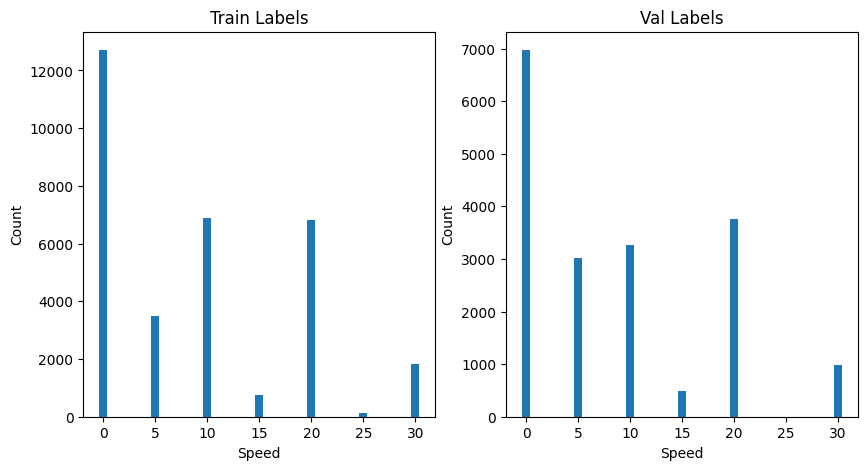

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# count_train_labels = Counter({0: 12706, 10: 6888, 20: 6809, 5: 3505, 30: 1831, 15: 749, 25: 123})
ax[0].bar(list(count_train_labels.keys()), list(count_train_labels.values()))
ax[0].set_title("Train Labels")
ax[0].set_xlabel("Speed")
ax[0].set_ylabel("Count")

# count_val_labels = Counter({0: 12706, 10: 6888, 20: 6809, 5: 3505, 30: 1831, 15: 749, 25: 123})
ax[1].bar(list(count_val_labels.keys()), list(count_val_labels.values()))
ax[1].set_title("Val Labels")
ax[1].set_xlabel("Speed")
ax[1].set_ylabel("Count")

plt.show()

In [37]:
cnt_labels_per_event = {
    "train": {},
    "val": {}
}

visited_samples = set()
for subset, wts_labels in zip(["train", "val"], [wts_train_labels, wts_val_labels]):
    for sample in wts_labels:
        image_name = sample['image_name'] # 20230707_12_SN17_T1_vehicle_view_event_0_seq2
        speed = sample['speed']
        parts = image_name.split("_")
        event_idx = int(parts[-2])
        video_name = "_".join(parts[:-1])
        
        if video_name in visited_samples:
            continue
        
        if event_idx not in cnt_labels_per_event[subset]:
            cnt_labels_per_event[subset][event_idx] = {s: 0 for s in range(0, 31, 5)}
        
        cnt_labels_per_event[subset][event_idx][speed] += 1
        visited_samples.add(video_name)

cnt_labels_per_event

{'train': {0: {0: 57, 5: 9, 10: 16, 15: 2, 20: 14, 25: 0, 30: 1},
  1: {0: 45, 5: 13, 10: 14, 15: 1, 20: 14, 25: 1, 30: 4},
  2: {0: 21, 5: 24, 10: 29, 15: 1, 20: 17, 25: 2, 30: 3},
  3: {0: 5, 5: 12, 10: 32, 15: 3, 20: 36, 25: 0, 30: 14},
  4: {0: 82, 5: 7, 10: 7, 15: 2, 20: 2, 25: 0, 30: 1}},
 'val': {0: {0: 35, 5: 9, 10: 5, 15: 0, 20: 4, 25: 0, 30: 2},
  1: {0: 29, 5: 9, 10: 11, 15: 0, 20: 4, 25: 0, 30: 1},
  2: {0: 14, 5: 19, 10: 16, 15: 1, 20: 5, 25: 0, 30: 1},
  3: {0: 4, 5: 10, 10: 14, 15: 4, 20: 17, 25: 0, 30: 6},
  4: {0: 39, 5: 4, 10: 5, 15: 1, 20: 6, 25: 0, 30: 0}}}

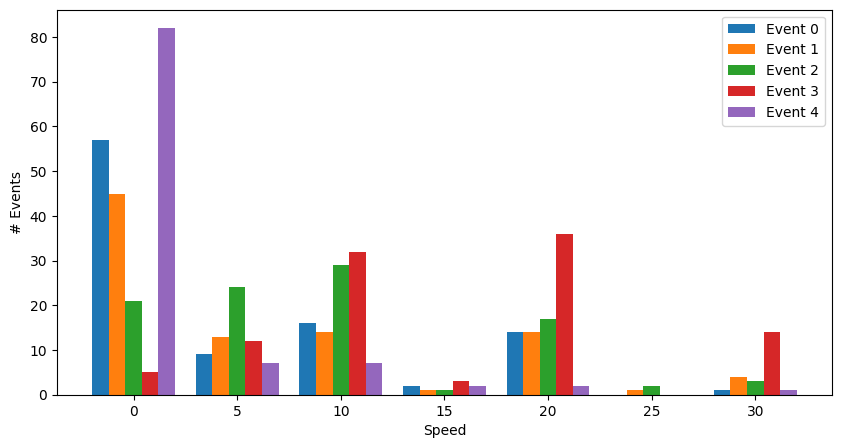

In [44]:
xs = list(cnt_labels_per_event["train"][0].keys()) # [0, 5, 10, 15, 20, 25, 30]

train_event0 = list(cnt_labels_per_event["train"][0].values())
train_event1 = list(cnt_labels_per_event["train"][1].values())
train_event2 = list(cnt_labels_per_event["train"][2].values())
train_event3 = list(cnt_labels_per_event["train"][3].values())
train_event4 = list(cnt_labels_per_event["train"][4].values())

width = 0.8
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([x - 2*width for x in xs], train_event0, width, label='Event 0')
ax.bar([x - width for x in xs], train_event1, width, label='Event 1')
ax.bar(xs, train_event2, width, label='Event 2')
ax.bar([x + width for x in xs], train_event3, width, label='Event 3')
ax.bar([x + 2*width for x in xs], train_event4, width, label='Event 4')

plt.xlabel('Speed')
plt.ylabel('# Events')
plt.legend()

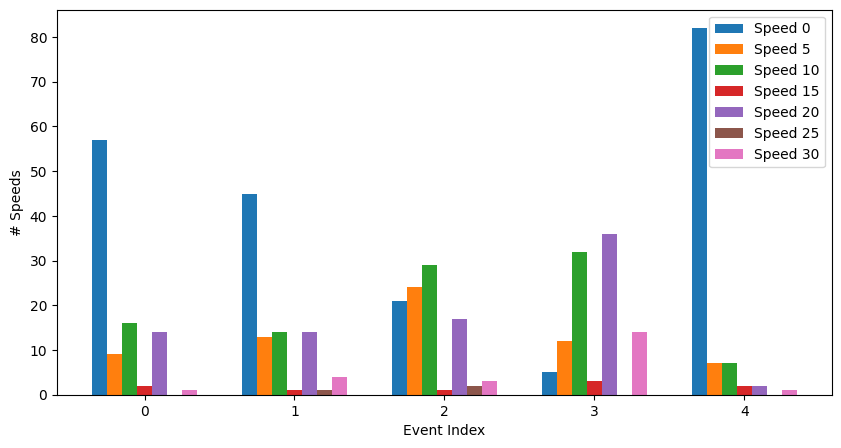

In [47]:
xs = [0, 1, 2, 3, 4] # number of events

# speeds = [0, 5, 10, 15, 20, 25, 30]
speed0 = [cnt_labels_per_event["train"][i][0] for i in range(5)]
speed5 = [cnt_labels_per_event["train"][i][5] for i in range(5)]
speed10 = [cnt_labels_per_event["train"][i][10] for i in range(5)]
speed15 = [cnt_labels_per_event["train"][i][15] for i in range(5)]
speed20 = [cnt_labels_per_event["train"][i][20] for i in range(5)]
speed25 = [cnt_labels_per_event["train"][i][25] for i in range(5)]
speed30 = [cnt_labels_per_event["train"][i][30] for i in range(5)]

width = 0.1
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([x - 3*width for x in xs], speed0, width, label='Speed 0')
ax.bar([x - 2*width for x in xs], speed5, width, label='Speed 5')
ax.bar([x - width for x in xs], speed10, width, label='Speed 10')
ax.bar(xs, speed15, width, label='Speed 15')
ax.bar([x + width for x in xs], speed20, width, label='Speed 20')
ax.bar([x + 2*width for x in xs], speed25, width, label='Speed 25')
ax.bar([x + 3*width for x in xs], speed30, width, label='Speed 30')

plt.xlabel('Event Index')
plt.ylabel('# Speeds')
plt.legend()

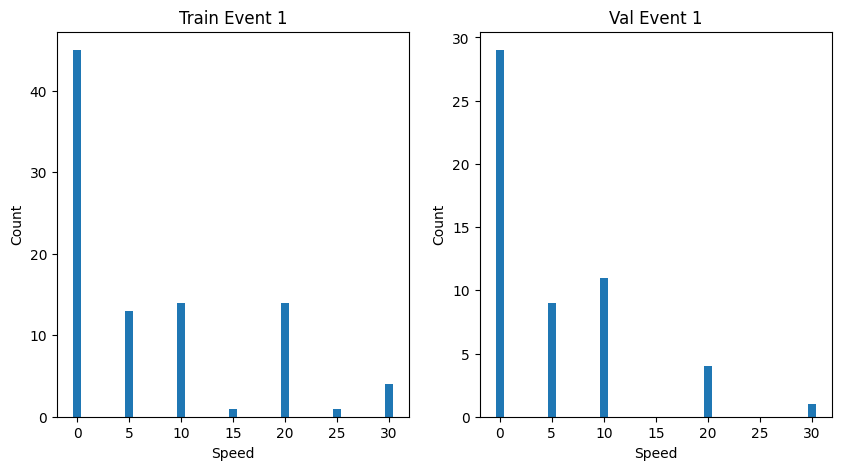

In [30]:
# plot event 1
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(list(cnt_labels_per_event['train'][1].keys()), list(cnt_labels_per_event['train'][1].values()))
ax[0].set_title("Train Event 1")
ax[0].set_xlabel("Speed")
ax[0].set_ylabel("Count")

ax[1].bar(list(cnt_labels_per_event['val'][1].keys()), list(cnt_labels_per_event['val'][1].values()))
ax[1].set_title("Val Event 1")
ax[1].set_xlabel("Speed")
ax[1].set_ylabel("Count")

plt.show()

In [ ]:
# plot event 2
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(list(cnt_labels_per_event['train'][2].keys()), list(cnt_labels_per_event['train'][2].values()))
ax[0].set_title("Train Event 2")
ax[0].set_xlabel("Speed")


In [ ]:
# weight loss, binary classification for 0 speed and non-0 speed
# 